In [31]:
import pickle5 as pk5
from pathlib import Path

import numpy as np

In [32]:
data_dir = Path('/workspace/lld_au_bert')

In [33]:
with open(data_dir/'mosei_of_os_bert_emotions.pkl', 'rb') as f:
    data = pk5.load(f)

In [34]:
with open(data_dir/'mosei_of_os_bert_sentiment.pkl', 'rb') as f:
    datas = pk5.load(f)

In [42]:
data['train']['labels'].shape

(8689, 6)

In [46]:
datas['train']['labels'].min()

-3.0

In [68]:
np.mean(np.abs(datas['test']['labels']))

0.87996346

In [62]:
1-np.mean(np.abs(data['test']['labels']))

0.8297957926988602

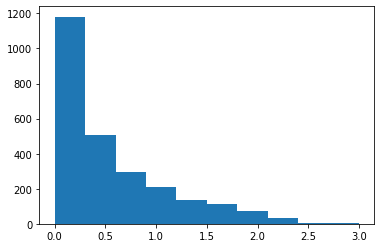

In [63]:
import matplotlib.pyplot as plt

plt.hist(data['test']['labels'][:, 0])
plt.show()

In [39]:
np.all(datas['train']['vision'] == data['train']['vision'])

True

In [29]:
l = data['valid']['labels'].shape[0]
len(set([str(data['train']['labels'][i, ]) for i in range(l)]))

276

In [30]:
set([str(data['train']['labels'][i, ]) for i in range(l)])

{'[0.         0.         0.         0.         0.         0.33333334]',
 '[0.         0.         0.         0.         0.33333334 0.        ]',
 '[0.         0.         0.         0.         0.33333334 0.33333334]',
 '[0.         0.         0.         0.33333334 0.         0.        ]',
 '[0.         0.         0.         0.33333334 0.33333334 0.        ]',
 '[0.         0.         0.         0.33333334 0.6666667  0.        ]',
 '[0.         0.         0.         0.33333334 1.         0.        ]',
 '[0.         0.         0.         0.33333334 1.3333334  0.        ]',
 '[0.         0.         0.         0.6666667  0.33333334 0.        ]',
 '[0.         0.         0.         1.         0.33333334 0.        ]',
 '[0.         0.         0.         1.3333334  0.33333334 0.6666667 ]',
 '[0.         0.         0.33333334 0.         0.         0.        ]',
 '[0.         0.         0.33333334 0.         0.         0.33333334]',
 '[0.         0.         0.33333334 0.         0.         1.    

In [18]:
data['valid']['labels'].mean(axis=1)

array([0.05555556, 0.16666667, 0.2777778 , ..., 0.05555556, 0.05555556,
       0.11111111], dtype=float32)

In [5]:
l = data['train']['labels']
l.mean(), l.std()

(0.17060202, 0.38884863)

In [6]:
l = data['valid']['labels']
l.mean(), l.std()

(0.15788957, 0.35869458)

In [7]:
l = data['test']['labels']
l.mean(), l.std()

(0.1702042, 0.38322833)

In [8]:
type(data)

dict

In [9]:
data.keys()

dict_keys(['train', 'valid', 'test'])

In [10]:
type(data['train'])

dict

In [11]:
data['train'].keys()

dict_keys(['vision', 'text', 'audio', 'labels'])

In [12]:
type(data['train']['vision'])

numpy.ndarray

In [13]:
data['train']['vision'].shape

(1284, 500, 35)

In [14]:
data['train']['text'].shape

(1284, 50, 768)

In [15]:
data['train']['audio'].shape

(1284, 500, 25)

In [16]:
data['train']['labels'].shape

(1284, 1, 1)

# Norm

In [9]:
mods = ["visual", "text", "audio"]


def get_norms(i):
    mod_data = data['train'][i]
    a_list = [mod_data[j,] for j in range(mod_data.shape[0])]
    a_array = np.concatenate(a_list)
    return np.mean(a_array, axis=0), np.std(a_array, axis=0)

In [10]:
a_mean, a_std = get_norms("audio")
v_mean, v_std = get_norms("vision")
# t_mean, t_std = get_norms(2)

np.savez("mosei_norms", a_mean=a_mean, a_std=a_std, v_mean = v_mean, v_std = v_std)

In [11]:
a_mean.shape, v_mean.shape

((25,), (35,))

In [12]:
a_std.shape, v_std.shape

((25,), (35,))